In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('civ2.csv')

## Understanding data

In [3]:
df.shape

(263, 42)

In [4]:
df.head()

,random,version,terminated,tenure_months,term_reason,term_over,gender,ethnicity,roommate,smoker,future_plans,future_planning_six_months,future_planning_thirty_days,savings_motivation,change_your_life_motivation,commitment_to_padsplit_rules,has_trusted_contact,upset_easily,finds_common_ground,has_resources_for_help,self_reflection,helps_where_needed,early_to_rise,early_to_bed,volunteers,overwhelmed_by_bills,plans_for_future,uses_reminders,cleans_room,treat_yoself,risky_behavior_when_unobserved,unsure_of_future,past_spending_house,past_spending_food,past_spending_entertainment,past_spending_savings,past_spending_outstanding_debt,future_spending_house,future_spending_food,future_spending_entertainment,future_spending_savings,home_ownership_desire
0,0.558335,2,0,3.8,.,.,0,1,0,0,5,1,1,5,5,5,5,1,5,5,5,5,3,5,1,1,5,5,5,5,1,1,5,0,0,5,0,6,0,0,4,5
1,0.157270,2,1,.,4,0,.,.,0,0,.,.,.,.,.,5,.,.,5,.,.,.,.,.,0,.,.,.,5,.,.,.,.,.,.,.,.,.,.,.,.,5
2,0.505740,2,0,4.6,.,.,1,1,0,0,5,1,1,4,5,5,1,4,3,3,3,3,3,4,2,2,4,2,5,2,1,2,7,3,.,.,.,6,3,0,1,1
3,0.480949,2,1,0.5,3,1,1,1,0,0,5,1,1,5,5,5,5,1,3,4,3,4,2,4,3,3,5,4,5,4,1,3,2,2,2,2,2,2,2,2,2,5
4,0.673728,2,0,3.9,.,.,1,1,0,1,5,1,1,3,5,5,5,1,5,5,5,5,4,5,3,2,4,5,5,3,1,1,2,2,2,2,2,2,2,2,2,5


```
delete 'random' feature because it is not informative
```

In [5]:
df.drop(columns='random', inplace=True)

```
delete 'term_reason', 'term_over' because we do not know them at the time of the prediction
```

In [6]:
df.drop(columns=['term_reason', 'term_over'], inplace=True)

## Working with missing data

In [7]:
df.replace('.', np.nan, inplace=True)

In [8]:
df.isna().sum()

version                            0
terminated                         0
tenure_months                     31
gender                            18
ethnicity                         53
roommate                           1
smoker                             1
future_plans                      31
future_planning_six_months        44
future_planning_thirty_days       44
savings_motivation                30
change_your_life_motivation       30
commitment_to_padsplit_rules      17
has_trusted_contact               30
upset_easily                      30
finds_common_ground                0
has_resources_for_help            30
self_reflection                   30
helps_where_needed                30
early_to_rise                     31
early_to_bed                      31
volunteers                         0
overwhelmed_by_bills              30
plans_for_future                  30
uses_reminders                    30
cleans_room                        0
treat_yoself                      30
r

In [9]:
df_categorical = df.drop(columns=['tenure_months']).copy()
df_numerical = df[['tenure_months']].copy()

In [10]:
df_categorical.fillna(df_categorical.mode().iloc[0], inplace=True)
df_categorical = df_categorical.astype('int16')

df_numerical.fillna(df_numerical.astype('float16').mean().iloc[0], inplace=True)
df_numerical = df_numerical.astype('float16')

In [11]:
df = pd.concat([df_numerical, df_categorical], axis=1)

In [12]:
df.head()

,tenure_months,version,terminated,gender,ethnicity,roommate,smoker,future_plans,future_planning_six_months,future_planning_thirty_days,savings_motivation,change_your_life_motivation,commitment_to_padsplit_rules,has_trusted_contact,upset_easily,finds_common_ground,has_resources_for_help,self_reflection,helps_where_needed,early_to_rise,early_to_bed,volunteers,overwhelmed_by_bills,plans_for_future,uses_reminders,cleans_room,treat_yoself,risky_behavior_when_unobserved,unsure_of_future,past_spending_house,past_spending_food,past_spending_entertainment,past_spending_savings,past_spending_outstanding_debt,future_spending_house,future_spending_food,future_spending_entertainment,future_spending_savings,home_ownership_desire
0,3.800781,2,0,0,1,0,0,5,1,1,5,5,5,5,1,5,5,5,5,3,5,1,1,5,5,5,5,1,1,5,0,0,5,0,6,0,0,4,5
1,3.710938,2,1,1,1,0,0,5,1,1,5,5,5,5,1,5,5,5,5,5,5,0,1,5,5,5,3,1,1,2,2,1,2,2,3,2,1,3,5
2,4.601562,2,0,1,1,0,0,5,1,1,4,5,5,1,4,3,3,3,3,3,4,2,2,4,2,5,2,1,2,7,3,1,2,2,6,3,0,1,1
3,0.500000,2,1,1,1,0,0,5,1,1,5,5,5,5,1,3,4,3,4,2,4,3,3,5,4,5,4,1,3,2,2,2,2,2,2,2,2,2,5
4,3.900391,2,0,1,1,0,1,5,1,1,3,5,5,5,1,5,5,5,5,4,5,3,2,4,5,5,3,1,1,2,2,2,2,2,2,2,2,2,5


In [13]:
df['tenure_months'] = df['tenure_months'].astype('float').round(1)

## Visualize features

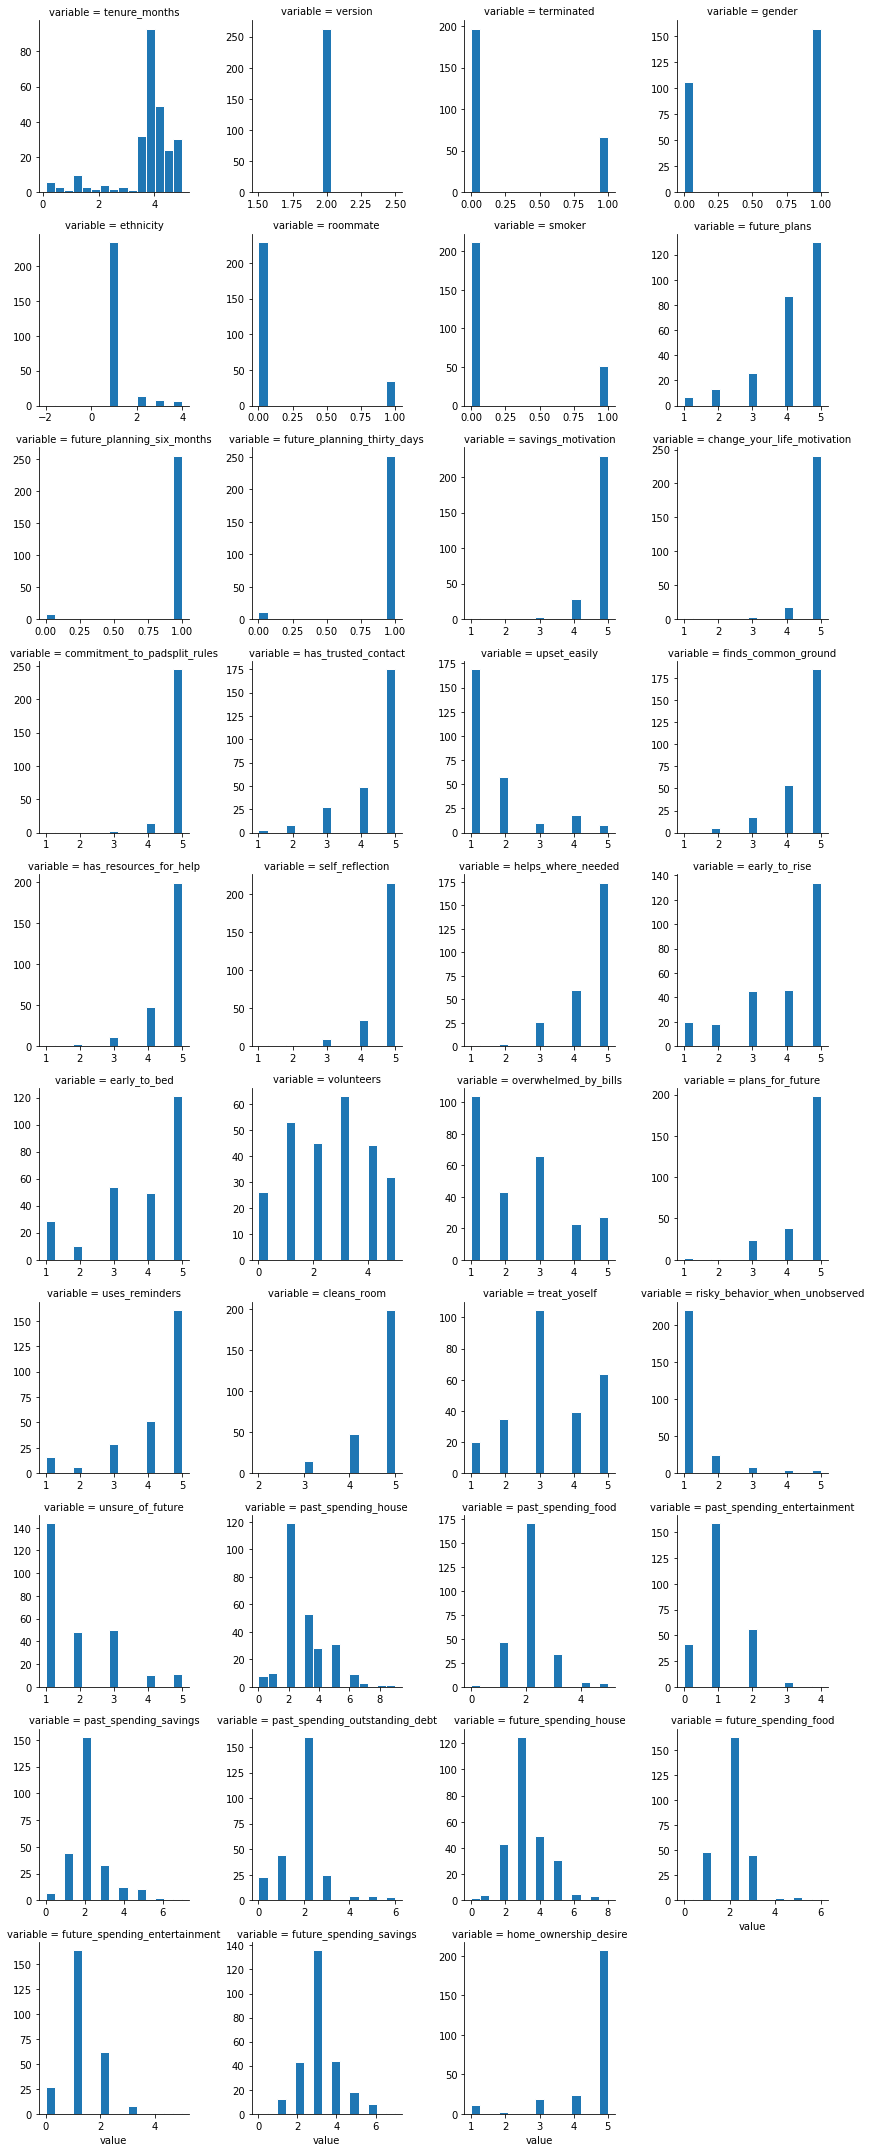

In [14]:
df_temp = pd.melt(df)
grid = sns.FacetGrid(df_temp, col='variable', col_wrap=4, sharex=False, sharey=False)
grid.map(plt.hist, 'value', edgecolor='w', bins=15)

```
As you can see, the parameter 'version' did not change at all, it is not informative.
```

In [15]:
df.drop(columns='version', inplace=True)

```
If one class in a multiclass variable has superiority, we combine the remaining classes into one
```

In [16]:
potential_binary_features = ['ethnicity', 'savings_motivation', 'change_your_life_motivation', 
                             'commitment_to_padsplit_rules', 'has_trusted_contact', 'upset_easily', 
                             'finds_common_ground', 'has_resources_for_help', 'self_reflection', 
                             'helps_where_needed', 'plans_for_future', 'cleans_room', 
                             'risky_behavior_when_unobserved', 'past_spending_food', 
                             'past_spending_savings', 'past_spending_outstanding_debt', 
                             'future_spending_food', 'home_ownership_desire']

for feature in potential_binary_features:
    mode_val = df[feature].mode().iloc[0]
    df.loc[df[feature] != mode_val, feature] = mode_val - 1

## Target observation

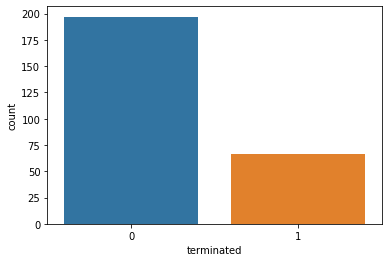

In [17]:
sns.countplot(df['terminated'])

## Apply model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [19]:
X = df.drop(columns='terminated')
y = df['terminated']

X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.33, random_state=1)

In [20]:
X_train.columns

Index(['tenure_months', 'gender', 'ethnicity', 'roommate', 'smoker',
       'future_plans', 'future_planning_six_months',
       'future_planning_thirty_days', 'savings_motivation',
       'change_your_life_motivation', 'commitment_to_padsplit_rules',
       'has_trusted_contact', 'upset_easily', 'finds_common_ground',
       'has_resources_for_help', 'self_reflection', 'helps_where_needed',
       'early_to_rise', 'early_to_bed', 'volunteers', 'overwhelmed_by_bills',
       'plans_for_future', 'uses_reminders', 'cleans_room', 'treat_yoself',
       'risky_behavior_when_unobserved', 'unsure_of_future',
       'past_spending_house', 'past_spending_food',
       'past_spending_entertainment', 'past_spending_savings',
       'past_spending_outstanding_debt', 'future_spending_house',
       'future_spending_food', 'future_spending_entertainment',
       'future_spending_savings', 'home_ownership_desire'],
      dtype='object')

```
LogisticRegression
```

In [21]:
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(X_train, y_train.values)
y_pred = lr.predict(X_test)

In [22]:
confusion_matrix(y_pred=y_pred, y_true=y_true, labels=[1, 0]).T

array([[19,  0],
       [ 1, 67]], dtype=int64)

In [23]:
f1_score(y_pred=y_pred, y_true=y_true) # so good score!

0.9743589743589743

```
RandomForest
```

In [24]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000)
rf.fit(X_train, y_train.values)
y_pred = rf.predict(X_test)

In [25]:
confusion_matrix(y_pred=y_pred, y_true=y_true, labels=[1, 0]).T

array([[19,  0],
       [ 1, 67]], dtype=int64)

In [26]:
f1_score(y_pred=y_pred, y_true=y_true)

0.9743589743589743

In [27]:
important_features = pd.Series(rf.feature_importances_, index=X_train.columns)
important_features.sort_values(ascending=False)

tenure_months                     0.379512
volunteers                        0.156428
past_spending_house               0.037724
treat_yoself                      0.028575
overwhelmed_by_bills              0.028570
early_to_bed                      0.028367
helps_where_needed                0.024475
early_to_rise                     0.021380
future_spending_savings           0.021164
unsure_of_future                  0.020669
future_plans                      0.020106
future_spending_entertainment     0.017420
home_ownership_desire             0.017402
future_spending_house             0.017258
uses_reminders                    0.017128
past_spending_food                0.016315
past_spending_entertainment       0.016032
future_spending_food              0.013525
past_spending_savings             0.012699
upset_easily                      0.012301
past_spending_outstanding_debt    0.010410
plans_for_future                  0.010192
has_trusted_contact               0.009444
gender     

Text(0.5, 1.0, 'The dependence of the target from highly correlated tenure_months')

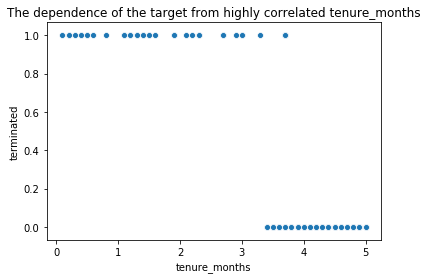

In [28]:
fig = sns.scatterplot(df['tenure_months'], df['terminated'])
fig.set_title('The dependence of the target from highly correlated tenure_months')

## without 'tenure_months'

```
models predict with high f1-score, but try to remove the parameter 'tenure_months' and see results
```

In [29]:
X_train = X_train.drop(columns=['tenure_months'])
X_test = X_test.drop(columns=['tenure_months'])

```
LinearRegression
```

In [30]:
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(X_train, y_train.values)
y_pred = lr.predict(X_test)

In [31]:
confusion_matrix(y_pred=y_pred, y_true=y_true, labels=[1, 0]).T

array([[10, 12],
       [10, 55]], dtype=int64)

In [32]:
f1_score(y_pred=y_pred, y_true=y_true)

0.47619047619047616

```
RandomForest
```

In [33]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train.values)
y_pred = rf.predict(X_test)

In [34]:
confusion_matrix(y_pred=y_pred, y_true=y_true, labels=[1, 0]).T

array([[ 9,  0],
       [11, 67]], dtype=int64)

In [35]:
f1_score(y_pred=y_pred, y_true=y_true)

0.6206896551724138

## visualize a tree

In [36]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

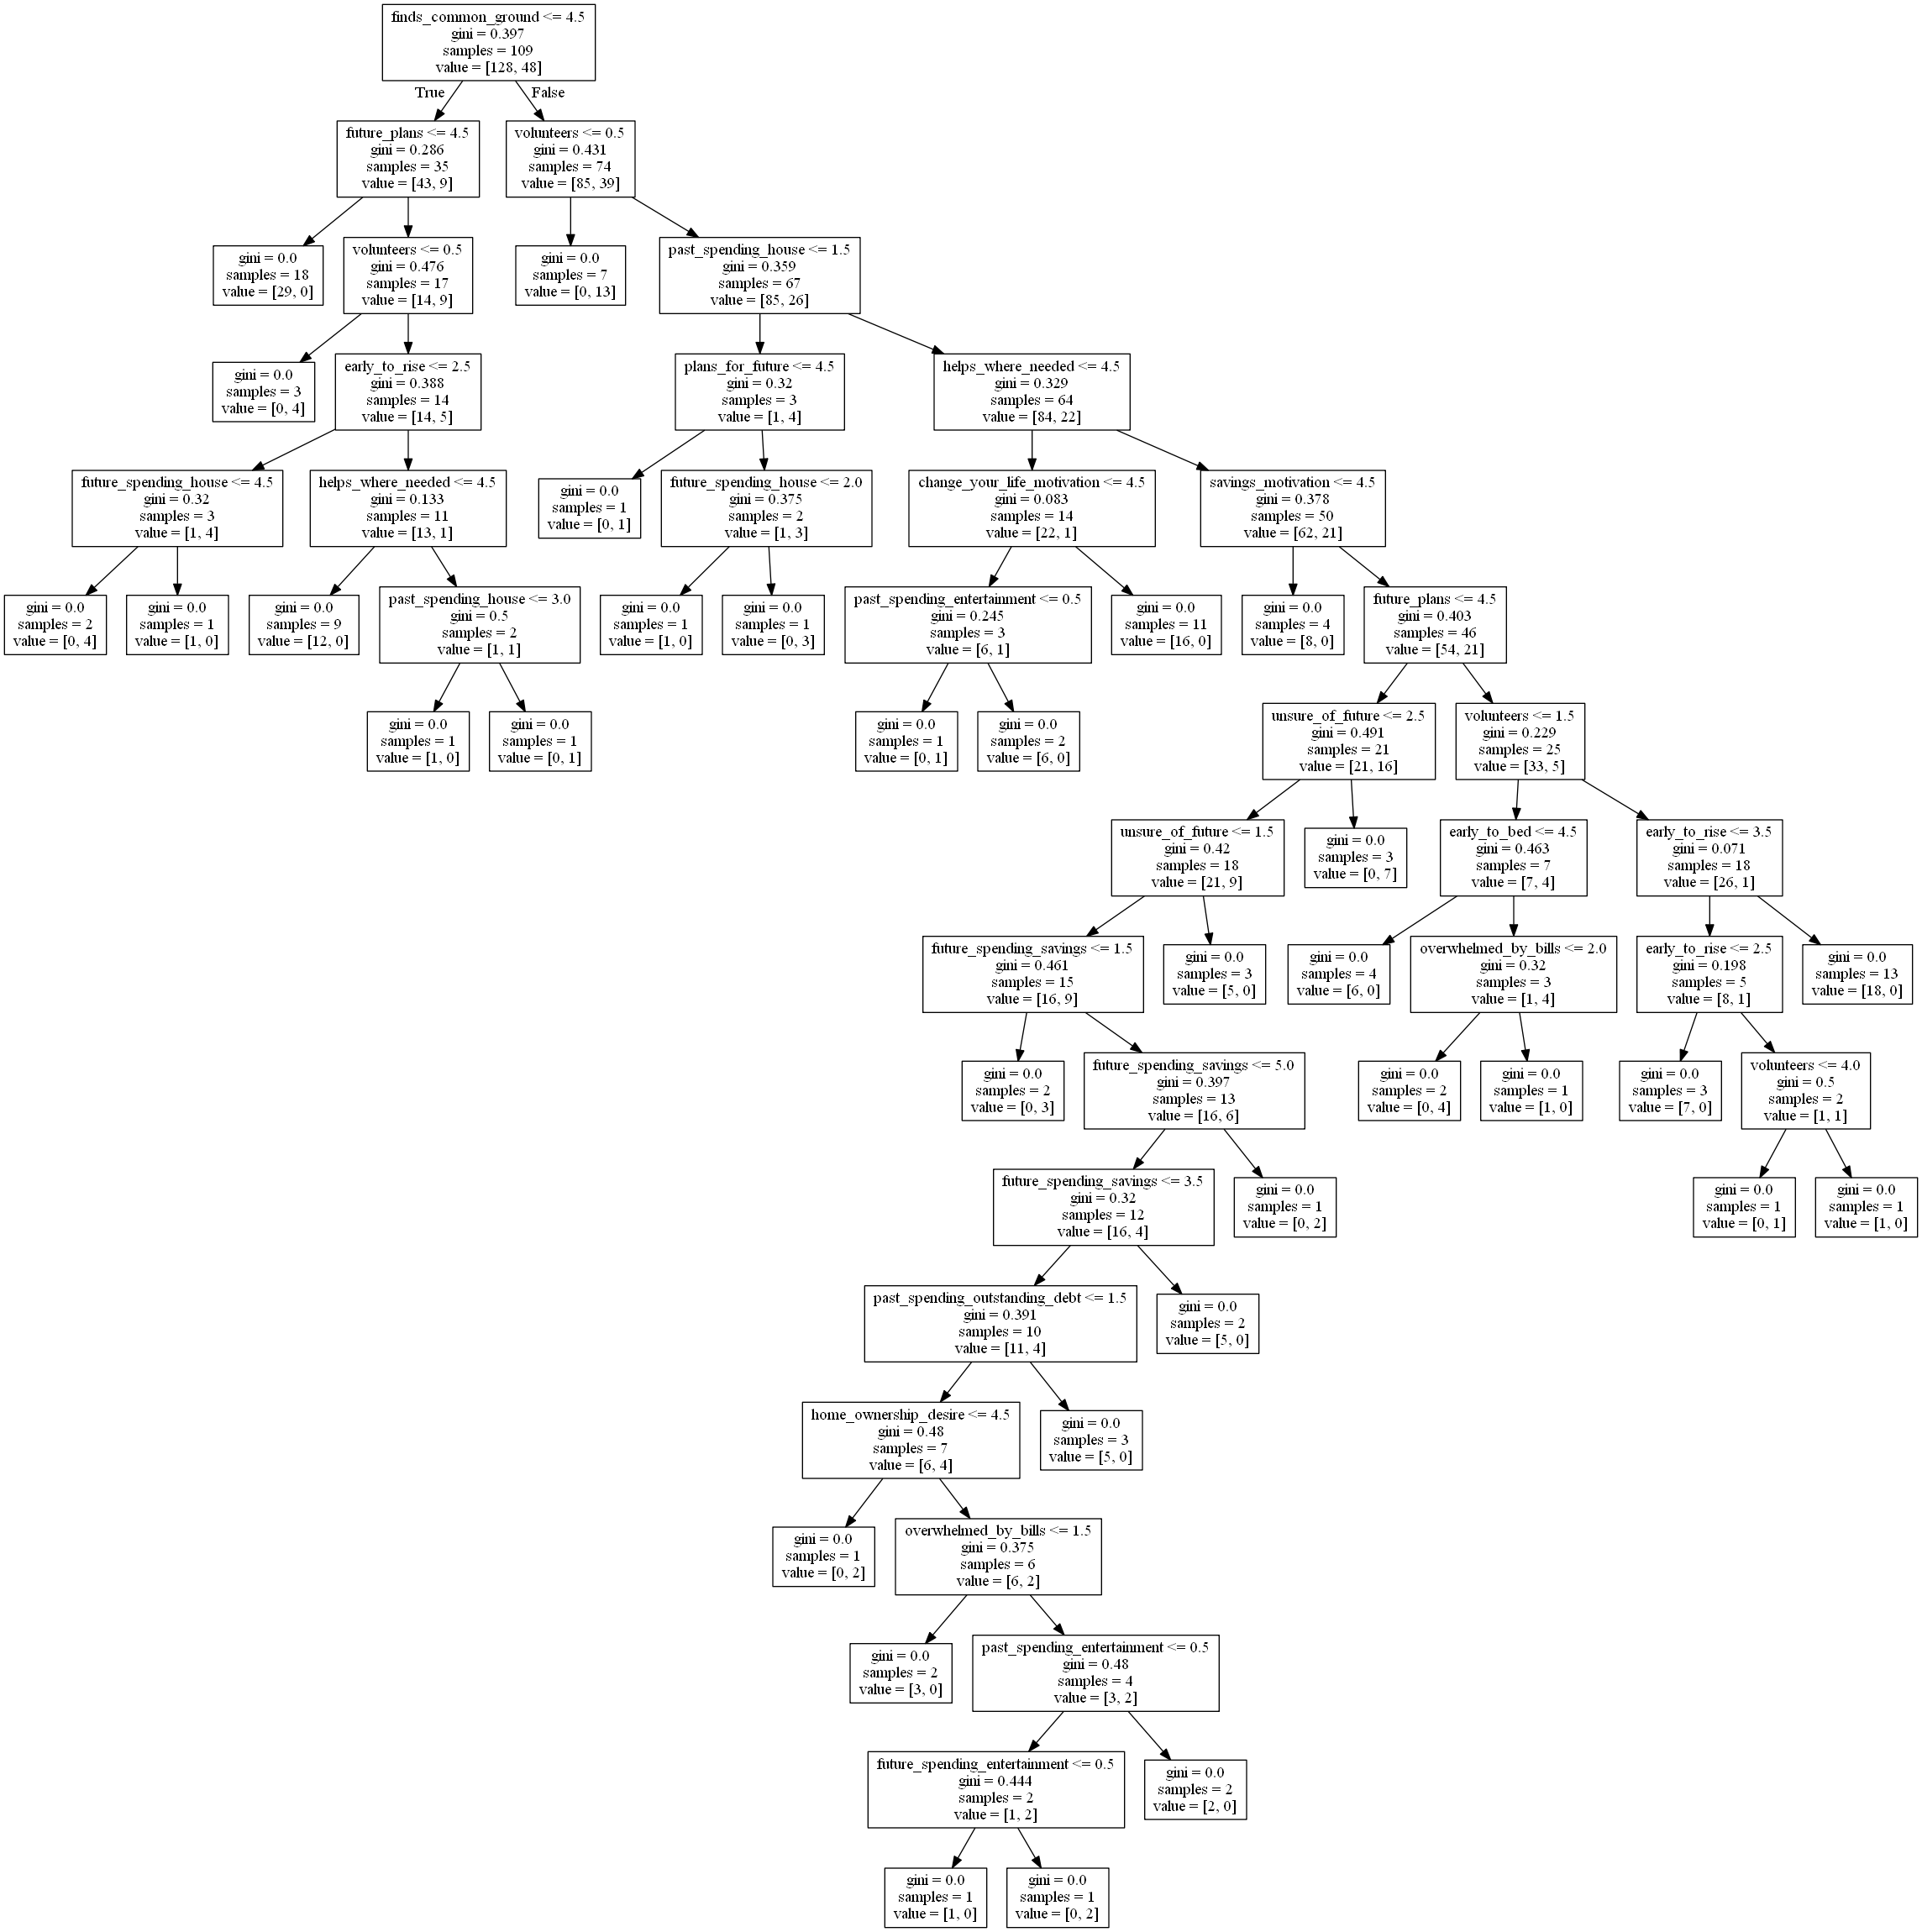

In [37]:
tree_count = 0
for tree_in_random_forest in rf.estimators_:
    if (tree_count ==1):        
        rfr_file = tree.export_graphviz(tree_in_random_forest, out_file=None, feature_names=X_train.columns)
        rfr_graph = pydotplus.graph_from_dot_data(rfr_file)        
    tree_count = tree_count + 1
Image(rfr_graph.create_png())

## And finally, what if we balance our target value?

In [38]:
df_zero = df.loc[df['terminated'] == 0]
df_one = df.loc[df['terminated'] == 1]

df_zero = df_zero.sample(df_one.shape[0], random_state=42)

In [39]:
print('Shape of df with 0:', df_zero.shape)
print('Shape of df with 1:', df_one.shape)


Shape of df with 0: (66, 38)
Shape of df with 1: (66, 38)


In [40]:
df = pd.concat([df_zero, df_one])

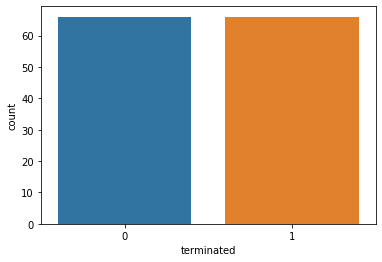

In [41]:
sns.countplot(df['terminated'])

In [42]:
X = df.drop(columns='terminated')
y = df['terminated']

X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.33, random_state=1)

In [43]:
X_train = X_train.drop(columns=['tenure_months'])
X_test = X_test.drop(columns=['tenure_months'])

```
LinearRegression
```

In [44]:
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(X_train, y_train.values)
y_pred = lr.predict(X_test)

In [45]:
confusion_matrix(y_pred=y_pred, y_true=y_true, labels=[1, 0]).T

array([[12,  5],
       [11, 16]], dtype=int64)

In [46]:
f1_score(y_pred=y_pred, y_true=y_true)

0.6

```
RandomForest
```

In [47]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train.values)
y_pred = rf.predict(X_test)

In [48]:
confusion_matrix(y_pred=y_pred, y_true=y_true, labels=[1, 0]).T

array([[ 8,  2],
       [15, 19]], dtype=int64)

In [49]:
f1_score(y_pred=y_pred, y_true=y_true)

0.48484848484848486

```
after all linear regression with balanced target gives better results while random forest losts accuracy
```